Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Data Collection and Processing

In [4]:
# loading the data from csv file to Pandas DataFrame
ad_data = pd.read_csv('/content/Advertising.csv')

In [5]:
# first 5 rows of the dataframe
ad_data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
# number of data points & number of features
ad_data.shape

(200, 5)

In [7]:
# getting some information about the dataset
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


Categorical Features:




*   Unnamed
*   TV
*   Radio
*   Newspaper
*   Sales





In [11]:
# checking for missing values
ad_data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

Data Analysis

In [12]:
ad_data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


Numerical Features

In [13]:
sns.set()

<ipython-input-15-0f9a61f147bf>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ad_data['TV'])


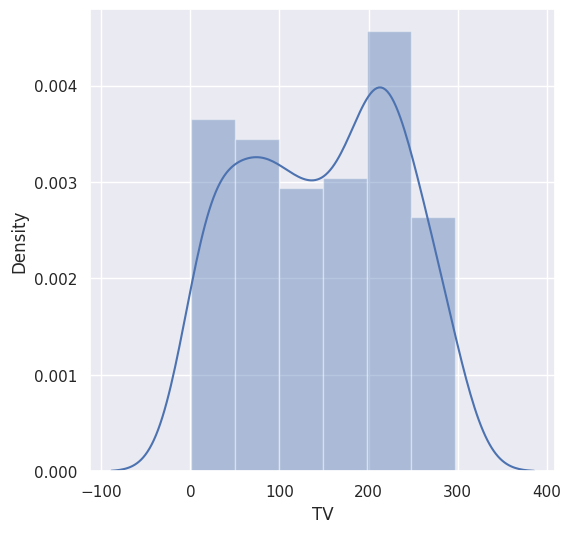

In [15]:
# TV distribution
plt.figure(figsize=(6,6))
sns.distplot(ad_data['TV'])
plt.show()

<ipython-input-16-45b500a5aa38>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ad_data['Radio'])


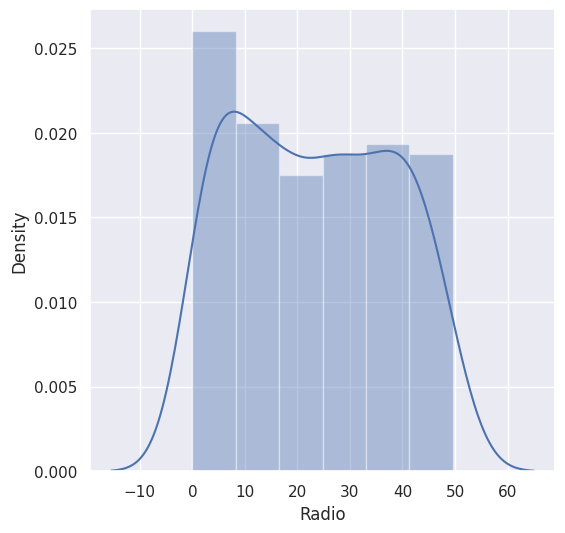

In [16]:
# Radio distribution
plt.figure(figsize=(6,6))
sns.distplot(ad_data['Radio'])
plt.show()

<ipython-input-17-367d7d9ba8a3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ad_data['Newspaper'])


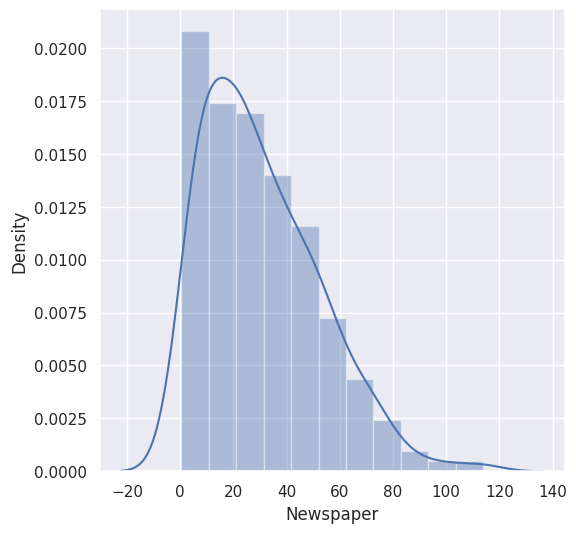

In [17]:
# Newspaper distribution
plt.figure(figsize=(6,6))
sns.distplot(ad_data['Newspaper'])
plt.show()

<ipython-input-18-ad912685f147>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ad_data['Sales'])


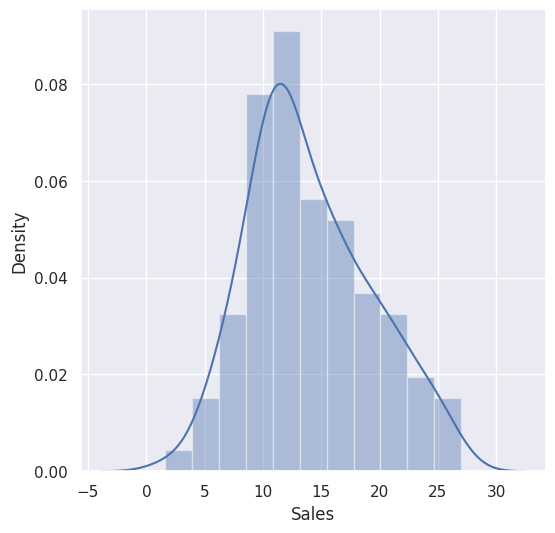

In [18]:
# Sales distribution
plt.figure(figsize=(6,6))
sns.distplot(ad_data['Sales'])
plt.show()

Data Pre-processing

In [19]:
ad_data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [20]:
ad_data['TV'].value_counts()

TV
199.8    2
109.8    2
17.2     2
177.0    2
222.4    2
        ..
139.3    1
216.8    1
199.1    1
26.8     1
232.1    1
Name: count, Length: 190, dtype: int64

In [25]:
ad_data.replace({'TV': {'199.8':'109.8','17.2':'177.0', '222.4':'232.1'}}, inplace=True)

In [26]:
ad_data['TV'].value_counts()

TV
199.8    2
109.8    2
17.2     2
177.0    2
222.4    2
        ..
139.3    1
216.8    1
199.1    1
26.8     1
232.1    1
Name: count, Length: 190, dtype: int64

Label Encoding

In [27]:
encoder = LabelEncoder()

In [28]:
ad_data['TV'] = encoder.fit_transform(ad_data['TV'])
ad_data['Radio'] = encoder.fit_transform(ad_data['Radio'])
ad_data['Newspaper'] = encoder.fit_transform(ad_data['Newspaper'])
ad_data['Sales'] = encoder.fit_transform(ad_data['Sales'])

In [29]:
ad_data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,153,131,159,106
1,2,32,136,124,31
2,3,12,156,160,23
3,4,98,142,149,89
4,5,112,41,148,54


Splitting features and Target

In [30]:
X = ad_data.drop(columns='TV', axis=1)
Y = ad_data['TV']

In [31]:
print(X)

     Unnamed: 0  Radio  Newspaper  Sales
0             1    131        159    106
1             2    136        124     31
2             3    156        160     23
3             4    142        149     89
4             5     41        148     54
..          ...    ...        ...    ...
195         196     18         44     14
196         197     21         23     27
197         198     35         20     53
198         199    145        158    118
199         200     34         27     57

[200 rows x 4 columns]


In [32]:
print(Y)

0      153
1       32
2       12
3       98
4      112
      ... 
195     28
196     63
197    111
198    181
199    154
Name: TV, Length: 200, dtype: int64


Splitting the data into Training data & Testing Data


In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [34]:
print(X.shape, X_train.shape, X_test.shape)

(200, 4) (160, 4) (40, 4)


Machine Learning Model Training

XGBoost Regressor

In [35]:
regressor = XGBRegressor()

In [36]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation

In [37]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [38]:
# R squared Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [39]:
print('R Squared value = ', r2_train)

R Squared value =  0.9999999965212151


In [40]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)

In [41]:
# R squared Value
r2_test = metrics.r2_score(Y_test, test_data_prediction)

In [42]:
print('R Squared value = ', r2_test)

R Squared value =  0.8822486177475143
